# Base Code

In [ ]:
!pip install numpy
!pip install librosa
!pip install matplotlib

In [ ]:
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

def autocorrelation(signal):
  samples = len(signal)
  windowed_signal = signal * np.hanning(samples) # apply hanning window filter
  correlation = np.correlate(windowed_signal, windowed_signal, mode='full') # cross correlation with self = auto correlation
  return correlation[samples-1:]

def extract_repetition(audio_signal, sample_rate):
  correlation = autocorrelation(audio_signal)
  threshold = np.mean(correlation) + 2 * np.std(correlation)
  peaks = np.where(correlation > threshold)[0]
  time_intervals = peaks / sr

  last_sig = 0
  peak_times = []
  for x in time_intervals:
    if x - last_sig > 2:
      peak_times.append(x)
      last_sig = x
  return audio_signal[:int(peak_times[0]*sr)], peak_times

def plot_audio_w_peaks(audio_signal, peak_times):
  plt.figure(figsize=(10, 4))
  librosa.display.waveshow(audio, sr=sr)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.title('Waveform')
  for time in peak_times:
    plt.axvline(x=time, color='pink')
  plt.show()

# Demo: Guitar

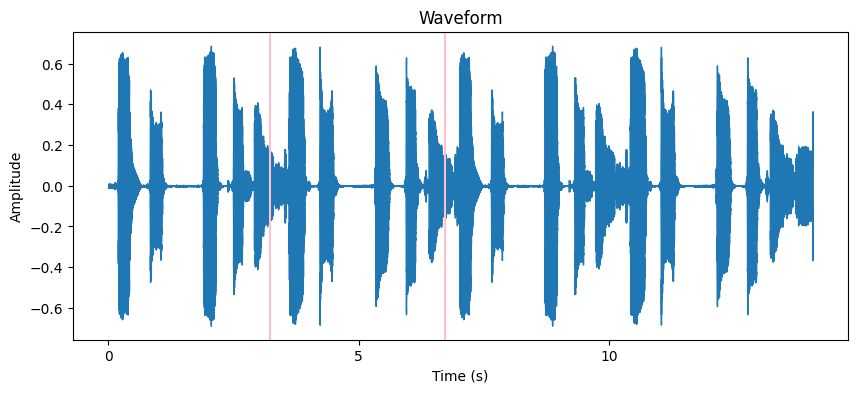

In [ ]:
guitar_signal, sr = librosa.load('guitar.wav')
extracted_audio, guitar_peak_times = extract_repetition(guitar_signal, sr)

plot_audio_w_peaks(guitar_signal, guitar_peak_times)

In [ ]:
# the whole sound clip
Audio(guitar_signal, rate=sr)

In [ ]:
# the extracted loop
first_peak = (int(guitar_peak_times[0] * sr))
Audio(guitar_signal[:first_peak], rate=sr)

# Demo: Piano

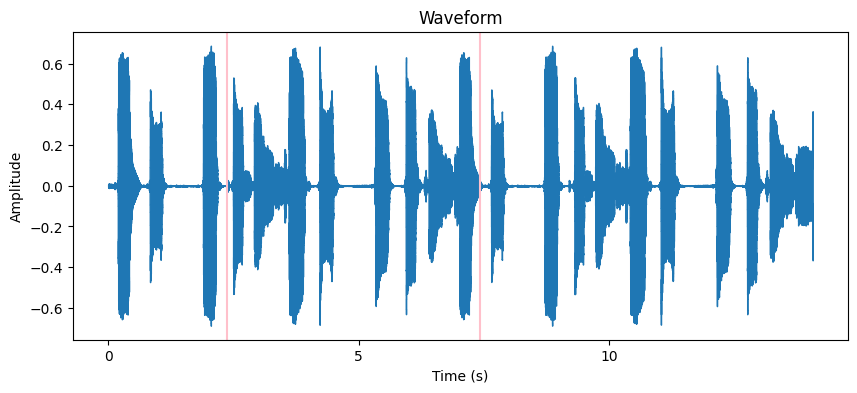

In [ ]:
piano_signal, sr = librosa.load('piano.wav')
extracted_audio, piano_peak_times = extract_repetition(piano_signal, sr)

plot_audio_w_peaks(piano_signal, piano_peak_times)

In [ ]:
# the whole sound clip
Audio(piano_signal, rate=sr)

In [ ]:
# the extracted loop
first_peak = (int(piano_peak_times[0] * sr))
Audio(piano_signal[:first_peak], rate=sr)

# Demo: Drum

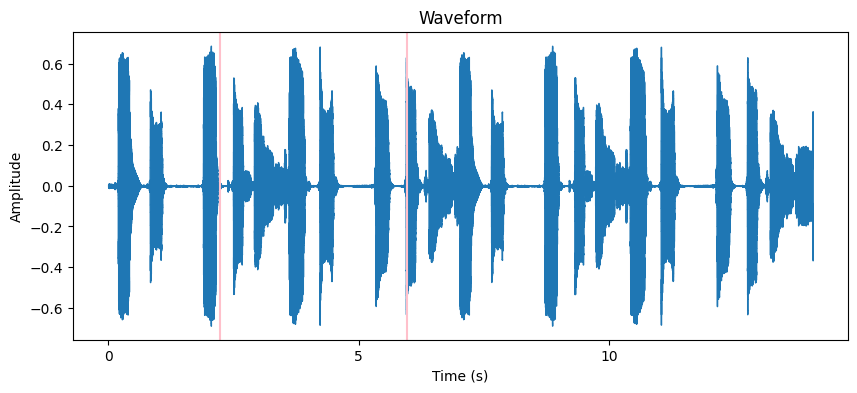

In [ ]:
drum_signal, sr = librosa.load('drum.wav')
extracted_audio, drum_peak_times = extract_repetition(drum_signal, sr)

plot_audio_w_peaks(drum_signal, drum_peak_times)

In [ ]:
# the whole sound clip
Audio(drum_signal, rate=sr)

In [ ]:
# the extracted loop
first_peak = (int(drum_peak_times[0] * sr))
Audio(drum_signal[:first_peak], rate=sr)

In [ ]:
# the extracted loop, looped over several times - it sounds like the original!
first_peak = (int(drum_peak_times[0] * sr))
Audio(np.concatenate([drum_signal[:first_peak], drum_signal[:first_peak], drum_signal[:first_peak], drum_signal[:first_peak]]), rate=sr)